In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# # Create a list for holding the cities.
cities = []
# # Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

#     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
         cities.append(city)
# # Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f95505f8cced9fc72397601ea76c9d25


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 46 of Set 12 | pouembout
Processing Record 47 of Set 12 | qaanaaq
Processing Record 48 of Set 12 | mogadishu
Processing Record 49 of Set 12 | necochea
Processing Record 50 of Set 12 | jamestown
Processing Record 51 of Set 12 | atuona
Processing Record 52 of Set 12 | rikitea
Processing Record 53 of Set 12 | gold coast
Processing Record 54 of Set 12 | tuktoyaktuk
Processing Record 55 of Set 12 | hilo
Processing Record 56 of Set 12 | hermanus
Processing Record 57 of Set 12 | cape town
Processing Record 58 of Set 12 | buariki
City not found. Skipping...
Processing Record 59 of Set 12 | punta arenas
Processing Record 60 of Set 12 | mataura
Processing Record 61 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 62 of Set 12 | pisco
Processing Record 63 of Set 12 | albany
Processing Record 64 of Set 12 | capinopolis
Processing Record 65 of Set 12 | kapaa
Processing Record 66 of Set 12 | puerto ayora
Processing Record 67 of Set 12 | thunder bay
Processing Rec

Processing Record 36 of Set 15 | hobart
Processing Record 37 of Set 15 | hudson bay
Processing Record 38 of Set 15 | birao
Processing Record 39 of Set 15 | crestview
Processing Record 40 of Set 15 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 15 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 15 | cherskiy
Processing Record 43 of Set 15 | hendijan
City not found. Skipping...
Processing Record 44 of Set 15 | norman wells
Processing Record 45 of Set 15 | port augusta
Processing Record 46 of Set 15 | kluczbork
Processing Record 47 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 15 | atlantic city
Processing Record 49 of Set 15 | isangel
Processing Record 50 of Set 15 | sola
Processing Record 1 of Set 16 | pauini
Processing Record 2 of Set 16 | waingapu
Processing Record 3 of Set 16 | grafton
Processing Record 4 of Set 16 | sinnamary
Processing Record 5 of Set 16 | mission
Processing Record 6 of Set 16 | vestmann

Processing Record 22 of Set 19 | zhigansk
Processing Record 23 of Set 19 | mount isa
Processing Record 24 of Set 19 | tuatapere
Processing Record 25 of Set 19 | ballybofey
Processing Record 26 of Set 19 | jacqueville
Processing Record 27 of Set 19 | suihua
Processing Record 28 of Set 19 | waipawa
Processing Record 29 of Set 19 | olinda
Processing Record 30 of Set 19 | shanghai
Processing Record 31 of Set 19 | ihosy
Processing Record 32 of Set 19 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 19 | rocha
Processing Record 34 of Set 19 | ulladulla
Processing Record 35 of Set 19 | kangaatsiaq
Processing Record 36 of Set 19 | oranjemund
Processing Record 37 of Set 19 | leshukonskoye
Processing Record 38 of Set 19 | warrnambool
Processing Record 39 of Set 19 | nowy dwor gdanski
Processing Record 40 of Set 19 | nurota
Processing Record 41 of Set 19 | luceville
City not found. Skipping...
Processing Record 42 of Set 19 | arlit
Processing Record 43 of Set 19 | la roda
Pr

Processing Record 5 of Set 23 | devils lake
Processing Record 6 of Set 23 | buchanan
Processing Record 7 of Set 23 | vostok
Processing Record 8 of Set 23 | alice springs
Processing Record 9 of Set 23 | praia
Processing Record 10 of Set 23 | borba
Processing Record 11 of Set 23 | vanavara
Processing Record 12 of Set 23 | glinka
Processing Record 13 of Set 23 | klaksvik
Processing Record 14 of Set 23 | bayshore gardens
Processing Record 15 of Set 23 | tual
Processing Record 16 of Set 23 | rawlins
Processing Record 17 of Set 23 | yerbogachen
Processing Record 18 of Set 23 | mezen
Processing Record 19 of Set 23 | siocon
Processing Record 20 of Set 23 | qorveh
Processing Record 21 of Set 23 | tommot
Processing Record 22 of Set 23 | kargopol
Processing Record 23 of Set 23 | luderitz
Processing Record 24 of Set 23 | iguape
Processing Record 25 of Set 23 | kusadak
Processing Record 26 of Set 23 | alindao
Processing Record 27 of Set 23 | kerema
Processing Record 28 of Set 23 | saint anthony
Pro

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date",
                    "Lat", "Lng", "Max Temp", "Humidity",
                    "Cloudiness", "Wind Speed"] 
# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pouembout,NC,2021-10-07 12:14:15,-21.1333,164.9000,67.41,73,2,7.18
1,Qaanaaq,GL,2021-10-07 12:14:15,77.4840,-69.3632,18.37,57,42,7.96
2,Mogadishu,SO,2021-10-07 12:14:16,2.0371,45.3438,80.42,69,9,18.77
3,Necochea,AR,2021-10-07 12:14:16,-38.5473,-58.7368,48.04,72,3,7.74
4,Jamestown,US,2021-10-07 12:12:33,42.0970,-79.2353,63.72,100,90,5.75
5,Atuona,PF,2021-10-07 12:14:16,-9.8000,-139.0333,77.38,77,8,14.92
6,Rikitea,PF,2021-10-07 12:14:17,-23.1203,-134.9692,72.99,79,75,12.86
7,Gold Coast,AU,2021-10-07 12:14:17,-28.0000,153.4333,68.00,88,90,4.00
8,Tuktoyaktuk,CA,2021-10-07 12:14:17,69.4541,-133.0374,29.86,78,24,13.09
9,Hilo,US,2021-10-07 12:09:25,19.7297,-155.0900,73.13,81,90,6.91


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

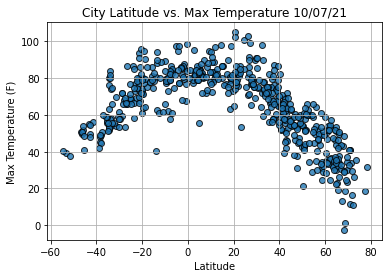

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()